In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
letter = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\letter-unsupervised-ad.csv',header = None)

In [5]:
letter

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6.0,10.0,5.0,6.0,3.0,10.0,6.0,4.0,6.0,14.0,...,0.0,8.0,14.0,6.0,6.0,0.0,10.0,2.0,7.0,n
1,0.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,0.0,7.0,13.0,6.0,8.0,0.0,8.0,1.0,7.0,n
2,4.0,7.0,5.0,5.0,3.0,7.0,8.0,2.0,7.0,7.0,...,1.0,7.0,7.0,6.0,8.0,0.0,8.0,2.0,8.0,n
3,1.0,6.0,1.0,4.0,2.0,7.0,7.0,0.0,7.0,7.0,...,1.0,8.0,7.0,6.0,8.0,0.0,8.0,3.0,8.0,n
4,1.0,2.0,1.0,3.0,1.0,7.0,7.0,1.0,7.0,7.0,...,1.0,8.0,7.0,6.0,9.0,0.0,8.0,3.0,8.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,10.0,4.0,7.0,12.0,8.0,2.0,10.0,0.0,8.0,o
1596,5.0,8.0,6.0,7.0,6.0,6.0,9.0,5.0,7.0,8.0,...,4.0,14.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0,o
1597,4.0,9.0,4.0,4.0,2.0,7.0,10.0,2.0,5.0,13.0,...,7.0,5.0,10.0,8.0,7.0,3.0,8.0,3.0,8.0,o
1598,6.0,10.0,6.0,7.0,5.0,5.0,11.0,3.0,7.0,11.0,...,2.0,3.0,12.0,6.0,5.0,2.0,9.0,8.0,8.0,o


In [7]:
shuffled_df = letter.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)


20


In [8]:
pca = PCA(n_components=20)
new_df = pca.fit_transform(df)
new_df
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.356937,1.131230,-3.179763,-2.718252,2.342672,-1.582685,1.474375,0.355617,0.168895,-0.684863,-0.589652,-0.789545,-0.638132,0.766245,-0.049148,0.518630,0.261166,-0.000646,-0.308746,-0.135207
1,1.031865,3.287735,-1.494932,0.405605,1.699707,1.978816,-0.548727,-2.071976,1.945342,0.593355,-0.819183,-0.773820,-2.047431,-1.222212,2.063812,-0.597472,-0.484173,-0.598336,0.516800,0.205595
2,-1.455907,-1.552535,-2.212346,1.732447,-0.688376,1.062875,0.206102,0.999718,0.753420,-0.028465,-0.590933,0.290699,0.193307,-0.977691,0.307289,0.106932,0.016009,0.207006,0.023174,0.136164
3,-3.362932,2.168682,2.740698,-1.721764,-2.093354,-0.089138,-0.331664,-0.876533,-0.120084,0.862071,0.238873,-0.386342,0.548399,0.295455,-0.435551,-0.730502,0.336576,-0.432649,0.202792,0.247567
4,-0.899731,0.367407,2.863844,-1.805190,0.702955,0.600429,-0.107500,1.826320,0.832909,1.064297,-0.953876,0.574122,1.182711,0.318169,-1.154466,0.212274,0.470454,-0.126918,0.672218,0.014938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2.759819,1.957702,0.468458,0.753853,-0.140927,0.755345,-1.151441,-0.360789,1.612316,-0.876968,1.890414,1.512160,2.675834,0.135094,-1.443038,2.603350,-0.528491,0.779215,-0.955817,-0.372597
1596,2.927552,-0.020497,0.428791,-1.596945,-0.734206,0.592150,1.100783,-0.403072,0.323186,-2.601606,1.391694,0.646140,0.166121,-0.009320,-0.214333,0.366511,-0.437898,-0.675621,-0.306663,-0.044205
1597,2.693380,-2.631458,0.126470,-0.635383,-1.052417,-1.146740,1.401406,-0.376517,0.571171,0.892202,-0.190191,-1.441275,-0.445468,0.005700,-0.179841,-0.127768,-0.483008,-0.407597,0.212870,0.113617
1598,3.353978,-1.247781,0.184441,-3.834789,-0.119582,0.232710,-0.504003,-1.149265,-1.496464,-1.107054,0.475888,1.092707,0.394314,0.717705,0.087140,-0.112615,-0.477231,-0.606322,0.052189,0.048989


In [9]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [11]:
lof = LOF()

cof = COF()

cblof = CBLOF(n_clusters=10)

knn = KNN()

lof.fit(df)

cof.fit(df)

knn.fit(df)

cblof.fit(df)

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=10, n_jobs=None, random_state=None,
   use_weights=False)

In [12]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,32
0,0
1,0
2,0
3,0
4,0
...,...
1595,1
1596,0
1597,0
1598,0


In [13]:
lof_pred = lof.labels_
lof_scores = lof.decision_scores_

knn_pred = knn.labels_
knn_scores = knn.decision_scores_

cblof_pred = cblof.labels_
cblof_scores = cblof.decision_scores_

cof_pred = cof.labels_
cof_scores = cof.decision_scores_

In [15]:
lof_accuracy = accuracy_score(y,lof_pred)
print(lof_accuracy)

0.90375


In [16]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8775


In [17]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.905


In [18]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.90125


F1-score: 0.41
ROC AUC: 0.88


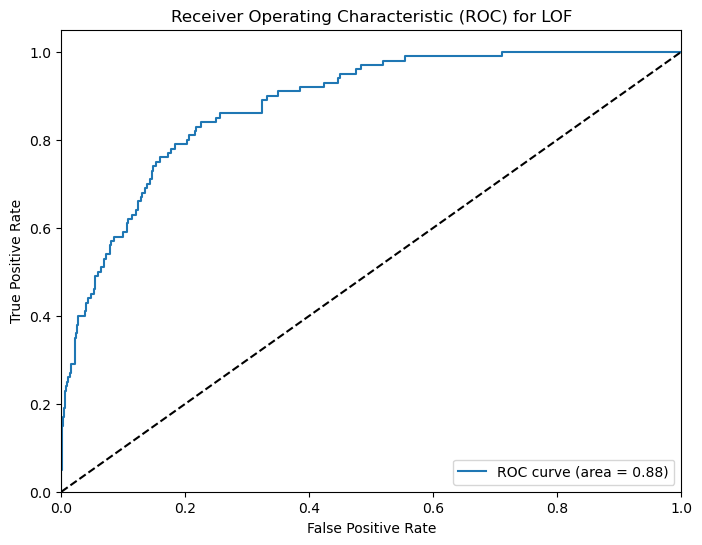

In [19]:
lof_f1 = f1_score(y, lof_pred)
print(f"F1-score: {lof_f1:.2f}")

roc_auc = roc_auc_score(y, lof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

lof_fpr, lof_tpr, _ = roc_curve(y, lof_scores)

plt.figure(figsize=(8, 6))
plt.plot(lof_fpr, lof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LOF')
plt.legend(loc="lower right")
plt.show()

0.8775
F1: 0.25
ROC AUC: 0.78


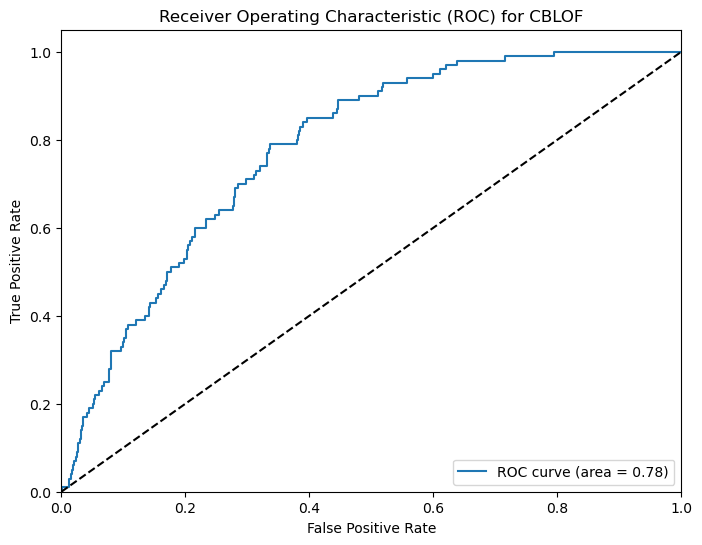

In [20]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

cblof_f1 = f1_score(y,cblof_pred)
print(f"F1: {cblof_f1:.2f}")

roc_auc = roc_auc_score(y, cblof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

cblof_fpr, cblof_tpr, _ = roc_curve(y, cblof_scores)

plt.figure(figsize=(8, 6))
plt.plot(cblof_fpr, cblof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CBLOF')
plt.legend(loc="lower right")
plt.show()

0.90125
F1: 0.39
ROC AUC: 0.89


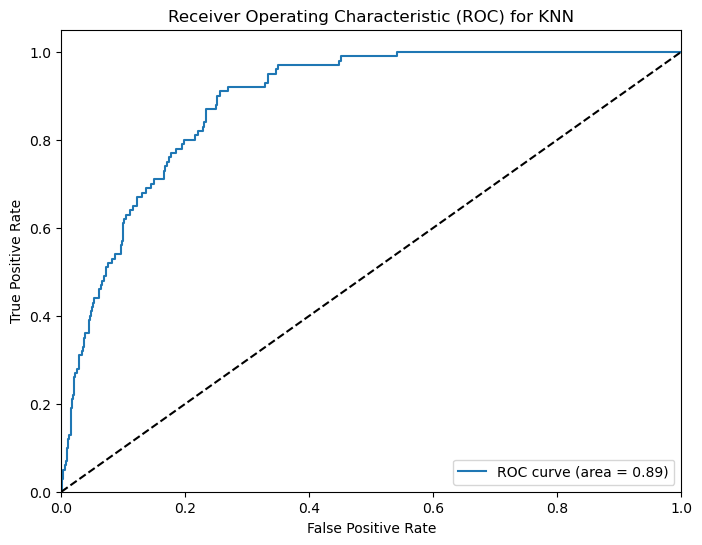

In [21]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

knn_f1 = f1_score(y,knn_pred)
print(f"F1: {knn_f1:.2f}")

roc_auc = roc_auc_score(y, knn_scores)
print(f"ROC AUC: {roc_auc:.2f}")

knn_fpr, knn_tpr, _ = roc_curve(y, knn_scores)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

0.905
F1-score: 0.42
ROC AUC: 0.87


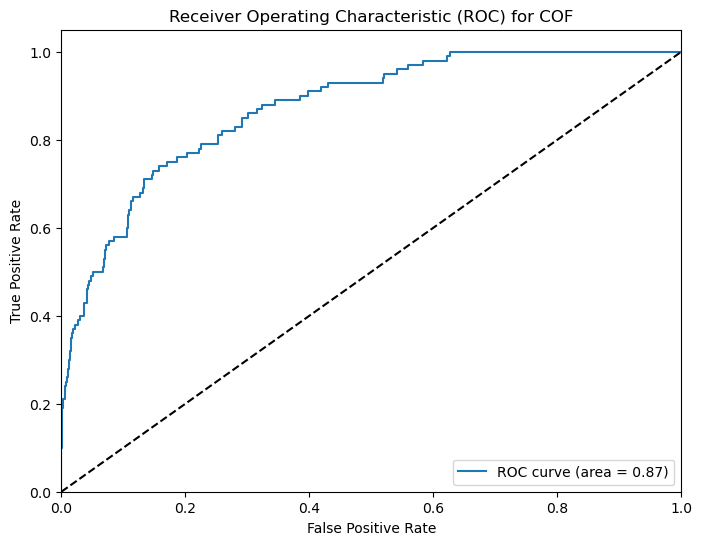

In [22]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

cof_f1 = f1_score(y, cof_pred)
print(f"F1-score: {cof_f1:.2f}")

roc_auc = roc_auc_score(y, cof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

cof_fpr, cof_tpr, _ = roc_curve(y, cof_scores)

plt.figure(figsize=(8, 6))
plt.plot(cof_fpr, cof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for COF')
plt.legend(loc="lower right")
plt.show()

Performance over multiple parameters

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score


c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

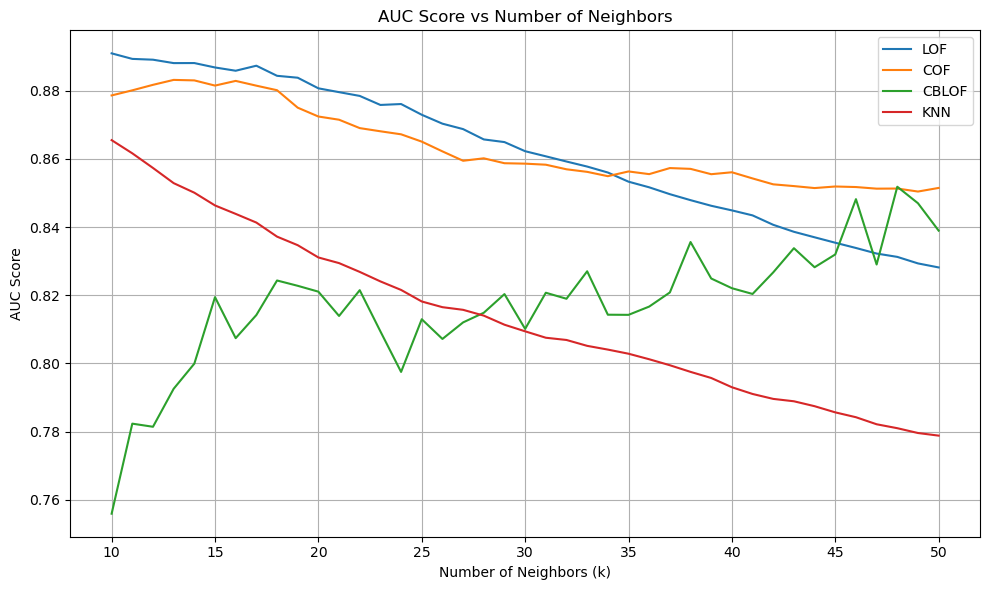

In [24]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []

precision_scores_lof = []
recall_scores_lof = []
f1_scores_lof = []


precision_scores_cblof = []
recall_scores_cblof = []
f1_scores_cblof = []

precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []

precision_scores_cof = []
recall_scores_cof = []
f1_scores_cof = []

n_neighbors_list = list(range(10, 51))

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    y_pred_lof = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)
    auc_scores_lof.append(auc_lof)
    precision_lof = precision_score(y, y_pred_lof)
    recall_lof = recall_score(y, y_pred_lof)
    f1_lof = f1_score(y, y_pred_lof)
    precision_scores_lof.append(precision_lof)
    recall_scores_lof.append(recall_lof)
    f1_scores_lof.append(f1_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    y_pred_cof = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)
    auc_scores_cof.append(auc_cof)
    precision_cof = precision_score(y, y_pred_cof)
    recall_cof = recall_score(y, y_pred_cof)
    f1_cof = f1_score(y, y_pred_cof)
    precision_scores_cof.append(precision_cof)
    recall_scores_cof.append(recall_cof)
    f1_scores_cof.append(f1_cof)

    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_pred_cblof = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)
    auc_scores_cblof.append(auc_cblof)
    precision_cblof = precision_score(y, y_pred_cblof)
    recall_cblof = recall_score(y, y_pred_cblof)
    f1_cblof = f1_score(y, y_pred_cblof)
    precision_scores_cblof.append(precision_cblof)
    recall_scores_cblof.append(recall_cblof)
    f1_scores_cblof.append(f1_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    y_pred_knn = knn_model.labels_
    precision_knn = precision_score(y, y_pred_knn)
    recall_knn = recall_score(y, y_pred_knn)
    f1_knn = f1_score(y, y_pred_knn)
    precision_scores_knn.append(precision_knn)
    recall_scores_knn.append(recall_knn)
    f1_scores_knn.append(f1_knn)
    auc_knn = roc_auc_score(y, y_scores_knn)
    auc_scores_knn.append(auc_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_precision_lof = np.mean(precision_scores_lof)
mean_recall_lof = np.mean(recall_scores_lof)
mean_f1_lof = np.mean(f1_scores_lof)
mean_precision_cblof = np.mean(precision_scores_cblof)
mean_recall_cblof = np.mean(recall_scores_cblof)
mean_f1_cblof = np.mean(f1_scores_cblof)
mean_precision_knn = np.mean(precision_scores_knn)
mean_recall_knn = np.mean(recall_scores_knn)
mean_f1_knn = np.mean(f1_scores_knn)
mean_precision_cof = np.mean(precision_scores_cof)
mean_recall_cof = np.mean(recall_scores_cof)
mean_f1_cof = np.mean(f1_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

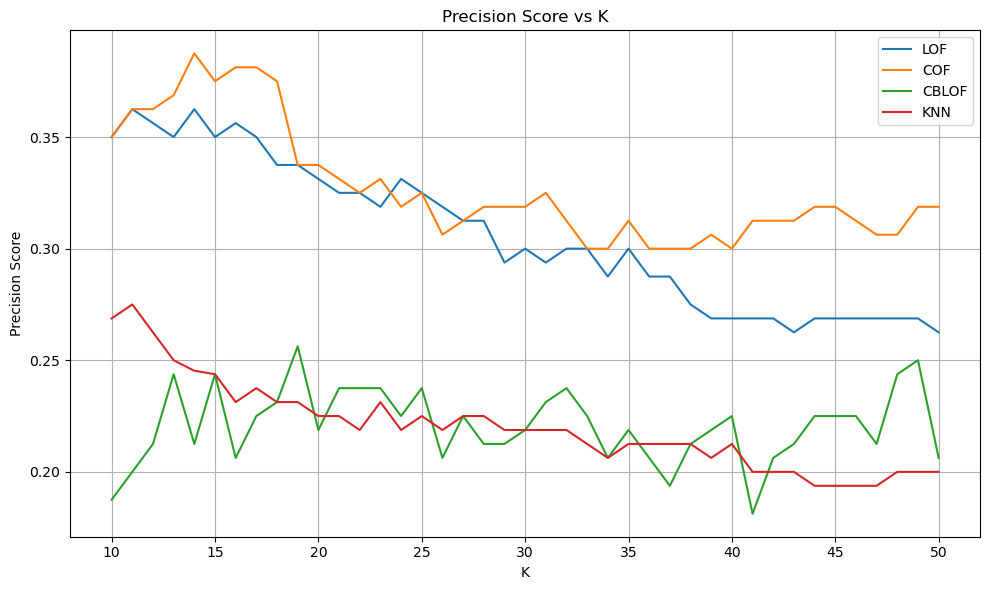

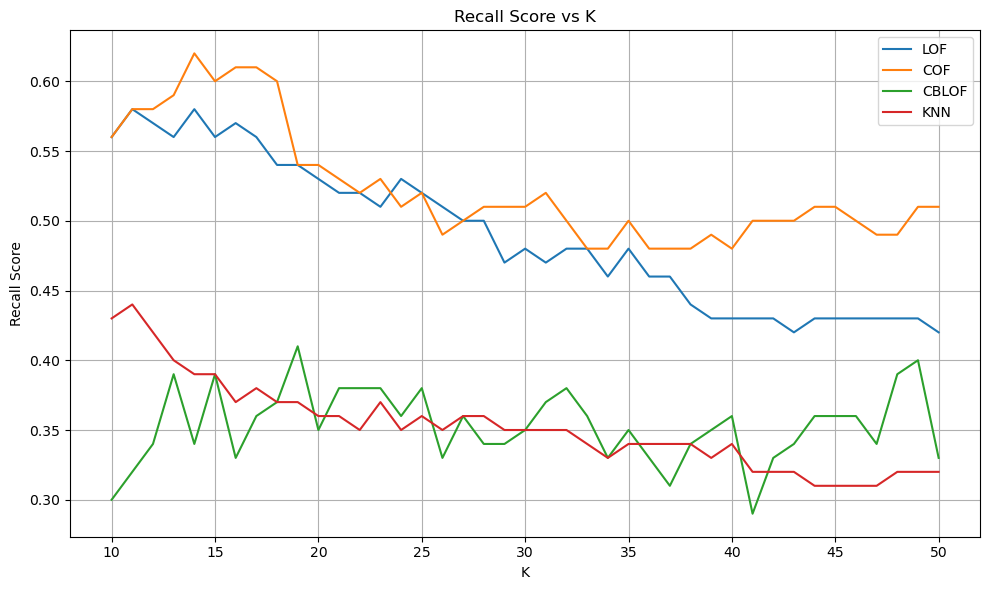

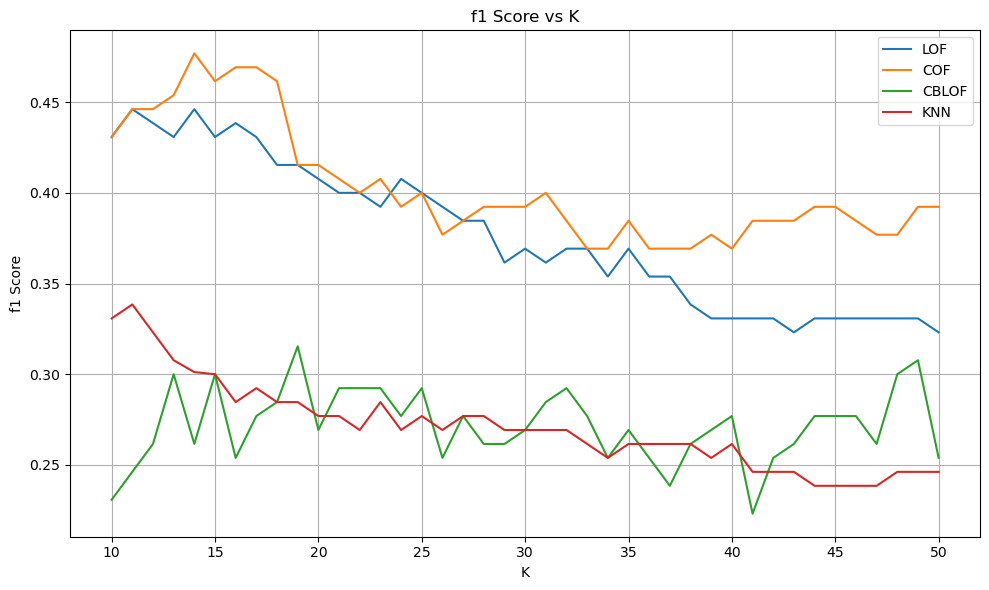

Mean Precision for LOF: 0.3061
Mean Recall for LOF: 0.4898
Mean F1 Score for LOF: 0.3767
Mean Precision for CBLOF: 0.2207
Mean Recall for CBLOF: 0.3532
Mean F1 Score for CBLOF: 0.2717
Mean Precision for KNN: 0.2202
Mean Recall for KNN: 0.3522
Mean F1 Score for KNN: 0.2709
Mean Precision for COF: 0.3273
Mean Recall for COF: 0.5237
Mean F1 Score for COF: 0.4028


In [25]:
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, precision_scores_lof, label='LOF')

plt.plot(n_neighbors_list, precision_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, precision_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, precision_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('Precision Score')
plt.title('Precision Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, recall_scores_lof, label='LOF')

plt.plot(n_neighbors_list, recall_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, recall_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, recall_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('Recall Score')
plt.title('Recall Score vs K')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, f1_scores_lof, label='LOF')

plt.plot(n_neighbors_list, f1_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, f1_scores_cblof, label='CBLOF')

plt.plot(n_neighbors_list, f1_scores_knn, label='KNN')


# Add labels and title
plt.xlabel('K')
plt.ylabel('f1 Score')
plt.title('f1 Score vs K')
plt.legend()

mean_precision_cof = np.mean(precision_scores_cof)
mean_recall_cof = np.mean(recall_scores_cof)
mean_f1_cof = np.mean(f1_scores_cof)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Mean Precision for LOF: {mean_precision_lof:.4f}")
print(f"Mean Recall for LOF: {mean_recall_lof:.4f}")
print(f"Mean F1 Score for LOF: {mean_f1_lof:.4f}")

print(f"Mean Precision for CBLOF: {mean_precision_cblof:.4f}")
print(f"Mean Recall for CBLOF: {mean_recall_cblof:.4f}")
print(f"Mean F1 Score for CBLOF: {mean_f1_cblof:.4f}")

print(f"Mean Precision for KNN: {mean_precision_knn:.4f}")
print(f"Mean Recall for KNN: {mean_recall_knn:.4f}")
print(f"Mean F1 Score for KNN: {mean_f1_knn:.4f}")

print(f"Mean Precision for COF: {mean_precision_cof:.4f}")
print(f"Mean Recall for COF: {mean_recall_cof:.4f}")
print(f"Mean F1 Score for COF: {mean_f1_cof:.4f}")

In [26]:
from emmv import emmv_scores

lof_emmv = emmv_scores(lof,df)
print('lof emmv',lof_emmv['em'])

cblof_emmv = emmv_scores(cblof,df)
print('cblof emmv',cblof_emmv['em'])

knn_emmv = emmv_scores(knn,df)
print('knn emmv',knn_emmv['em'])

cof_emmv = emmv_scores(cof,df)
print('cof emmv',cof_emmv['em'])


lof emmv 0.0050438125
cblof emmv 0.0050438125
knn emmv 0.0050438125
cof emmv 0.1421050805


In [27]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)


KNN auc 0.8139133333333333
LOF auc 0.8620990243902439
CBLOF auc 0.8173702439024391
COF auc 0.8634647154471543
